In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\gihan\Downloads\Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df1 = df.drop(['area_type','society','balcony','availability'],axis= 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
duplicate_sorted = df2[df2.duplicated()].sort_values('price')
 
print(duplicate_sorted)

              location       size total_sqft  bath   price
10527     Ananth Nagar      1 BHK        500   1.0   14.00
7901      Ananth Nagar      1 BHK        500   1.0   14.00
13224       Chandapura      1 BHK        520   1.0   14.04
11873       Chandapura      1 BHK        520   1.0   14.04
7825   Electronic City      2 BHK        550   1.0   15.00
...                ...        ...        ...   ...     ...
12887           Hebbal      3 BHK       3895   3.0  390.00
5082        Giri Nagar  4 Bedroom       2400   4.0  400.00
7802            Hebbal      4 BHK       3900   4.0  410.00
7524      Byadarahalli      4 BHK       3500   5.0  450.00
7892   Victoria Layout  5 Bedroom       2400   5.0  625.00

[881 rows x 5 columns]


In [9]:
df2.shape

(13246, 5)

In [10]:
df2.drop_duplicates(subset=None, keep="first", inplace=True)

C:\Users\gihan\AppData\Local\Temp\ipykernel_15508\3484339198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset=None, keep="first", inplace=True)


In [11]:
df2.shape

(12365, 5)

In [12]:
duplicate_sorted = df2[df2.duplicated()].sort_values('price')
 
print(duplicate_sorted)

Empty DataFrame
Columns: [location, size, total_sqft, bath, price]
Index: []


In [13]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df2.loc[:, 'bed'] = df2['size'].apply(lambda x: int(x.split()[0]))

C:\Users\gihan\AppData\Local\Temp\ipykernel_15508\2717975660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'bed'] = df2['size'].apply(lambda x: int(x.split()[0]))


In [15]:
df2.head()

,location,size,total_sqft,bath,price,bed
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

# Testing the function
print(is_float("2100"))
print(is_float("2100 - 2850"))
print(is_float("34.46Sq. Meter"))

True
False
False


In [18]:
df2[~df2['total_sqft'].apply(is_float)].head(15)

,location,size,total_sqft,bath,price,bed
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
print(convert_sqft_to_num("2100"))
print(convert_sqft_to_num("2100 - 2850"))
print(convert_sqft_to_num("1000Sq. Meter"))

2100.0
2475.0
None


In [20]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)

C:\Users\gihan\AppData\Local\Temp\ipykernel_15508\3766067606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)


In [64]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bed                   4
Name: 30, dtype: object

In [22]:
num_nan_values = df2['total_sqft'].isna().sum()

print("Number of NaN values in 'total_sqft' column:", num_nan_values)

Number of NaN values in 'total_sqft' column: 46


In [23]:
df2.dropna(subset=['total_sqft'], inplace=True)

C:\Users\gihan\AppData\Local\Temp\ipykernel_15508\950495116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['total_sqft'], inplace=True)


In [24]:
df2.shape

(12319, 6)

In [25]:
df3 = df2.copy()

In [26]:
df3.shape

(12319, 6)

In [27]:
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']

In [28]:
df3.head()

,location,size,total_sqft,bath,price,bed,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
len(df3.location.unique())

1298

In [38]:
df3.value_counts('location')

location
Whitefield             499
Sarjapur  Road         357
Electronic City        273
Thanisandra            222
Kanakpura Road         215
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: count, Length: 1298, dtype: int64

In [141]:
location_counts = df3.value_counts('location')

locations_less_than_10 = location_counts[location_counts <= 10]

print("Number of locations with 1 data point:", len(locations_less_than_10))

Number of locations with 1 data point: 1068


In [142]:
df4 = df3.copy()

In [143]:
df4['location'] = df3['location'].apply(lambda x: 'other_locations' if x in locations_less_than_10.index else x)

In [144]:
len(df4.location.unique())

231

In [148]:
df4.head()

,location,size,total_sqft,bath,price,bed,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [149]:
df4[df4.total_sqft/df4.bed<115.83].head(10)

,location,size,total_sqft,bath,price,bed,price_per_sqft
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
349,other_locations,3 Bedroom,11.0,3.0,74.0,3,672727.272727
482,Kenchenahalli,5 Bedroom,500.0,3.0,65.0,5,13000.000000
770,other_locations,9 Bedroom,600.0,9.0,190.0,9,31666.666667
789,other_locations,6 Bedroom,600.0,4.0,65.0,6,10833.333333
857,Vijayanagar,8 Bedroom,600.0,4.0,72.0,8,12000.000000
992,Rajaji Nagar,4 Bedroom,315.0,4.0,90.0,4,28571.428571
1020,other_locations,1 BHK,15.0,1.0,30.0,1,200000.000000
1048,other_locations,9 Bedroom,900.0,10.0,170.0,9,18888.888889
1103,5th Phase JP Nagar,9 Bedroom,812.0,6.0,165.0,9,20320.197044


In [150]:
df5 = df4[~(df4.total_sqft/df4.bed<115.83)]
df5.shape

(12246, 7)

In [151]:
df5.price_per_sqft.describe()

count     12246.000000
mean       6748.090809
std        4579.420113
min         267.829813
25%        4300.054585
50%        5488.940647
75%        7399.894292
max      176470.588235
Name: price_per_sqft, dtype: float64

In [152]:
import numpy as np

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean (subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft >= (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
                                                          
df6 = remove_pps_outliers(df5)
df6.shape

(10165, 7)

In [153]:
df7 = df6[df6.bath<df6.bed+2]

In [154]:
df7.shape

(10055, 7)

In [155]:
df7.head()

,location,size,total_sqft,bath,price,bed,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.0,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509


In [156]:
df8 = df7.drop(['size','price_per_sqft'],axis='columns')
df8.head()

,location,total_sqft,bath,price,bed
0,Devarachikkanahalli,1250.0,2.0,44.0,3
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3


In [157]:
df8.shape

(10055, 5)

In [158]:
dummies = pd.get_dummies(df8.location).astype(int)
dummies.head(10)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other_locations
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
df9 = pd.concat([df8,dummies.drop('other_locations',axis='columns')],axis='columns')
df9.head(3)

,location,total_sqft,bath,price,bed,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,1250.0,2.0,44.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
df10 = df9.drop('location',axis='columns')
df10.head(3)

,total_sqft,bath,price,bed,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,44.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
X = df10.drop('price',axis='columns')
X.head()

,total_sqft,bath,bed,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
y = df10.price
y.head()

0    44.0
1    40.0
2    83.0
3    40.0
4    65.0
Name: price, dtype: float64

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [164]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()

lr_clf.fit(X_train, y_train)

LinearRegression()

In [106]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [165]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_clf = GradientBoostingRegressor()

gbm_clf.fit(X_train, y_train)

GradientBoostingRegressor()

In [108]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [166]:
from xgboost import XGBRegressor

xgb_clf = XGBRegressor()

xgb_clf.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [110]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [167]:
from catboost import CatBoostRegressor

catboost_clf = CatBoostRegressor()

catboost_clf.fit(X_train, y_train)

Learning rate set to 0.056917
0:	learn: 86.6460832	total: 3.15ms	remaining: 3.15s
1:	learn: 84.1327958	total: 5.73ms	remaining: 2.86s
2:	learn: 81.7467537	total: 8.03ms	remaining: 2.67s
3:	learn: 79.5287754	total: 10.5ms	remaining: 2.63s
4:	learn: 77.5360646	total: 12.9ms	remaining: 2.56s
5:	learn: 75.6501051	total: 15.3ms	remaining: 2.53s
6:	learn: 73.8380089	total: 17.8ms	remaining: 2.53s
7:	learn: 72.2634647	total: 20.5ms	remaining: 2.54s
8:	learn: 70.7004155	total: 23ms	remaining: 2.53s
9:	learn: 69.2906264	total: 25.3ms	remaining: 2.51s
10:	learn: 67.9787638	total: 27.9ms	remaining: 2.51s
11:	learn: 66.7730494	total: 30.4ms	remaining: 2.5s
12:	learn: 65.6621633	total: 33.5ms	remaining: 2.54s
13:	learn: 64.5663404	total: 37ms	remaining: 2.6s
14:	learn: 63.6065302	total: 40.7ms	remaining: 2.67s
15:	learn: 62.6723148	total: 44.2ms	remaining: 2.72s
16:	learn: 61.7349293	total: 47.4ms	remaining: 2.74s
17:	learn: 60.8944214	total: 50.7ms	remaining: 2.76s
18:	learn: 60.1200186	total: 53.

In [168]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [124]:
# Replace special characters in column names with underscores
X_train.columns = [col.replace(' ', '_').replace(',', '_').replace('-', '_') for col in X_train.columns]



In [169]:
import lightgbm as lgb

lgb_clf = lgb.LGBMRegressor()

lgb_clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 8044, number of used features: 89
[LightGBM] [Info] Start training from score 92.694385


LGBMRegressor()

In [174]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred = lr_clf.predict(X_test)

r2_lr = lr_clf.score(X_test, y_test)
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print("Linear Regression Model R-Squared:", r2_lr)
print("Mean Absolute Error (MAE):", mae_lr)
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)

Linear Regression Model R-Squared: 0.7652947589085168
Mean Absolute Error (MAE): 21.318436658935653
Mean Squared Error (MSE): 1357.4306296291675
Root Mean Squared Error (RMSE): 36.84332544205487


In [175]:
y_predgbm = gbm_clf.predict(X_test)

r2gbm = r2_score(y_test, y_predgbm)
mae_gbm = mean_absolute_error(y_test, y_predgbm)
mse_gbm = mean_squared_error(y_test, y_predgbm)
rmse_gbm = np.sqrt(mse_gbm)

print("R-Squared for GBM:", r2gbm)
print("Mean Absolute Error (MAE) for GBM:", mae_gbm)
print("Mean Squared Error (MSE) for GBM:", mse_gbm)
print("Root Mean Squared Error (RMSE) for GBM:", rmse_gbm)

R-Squared for GBM: 0.7812854750842732
Mean Absolute Error (MAE) for GBM: 20.88527351652928
Mean Squared Error (MSE) for GBM: 1264.9474459314604
Root Mean Squared Error (RMSE) for GBM: 35.56609967274259


In [176]:
y_pred_xgb = xgb_clf.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("R-Squared Score for XGBoost:", r2_xgb)
print("Mean Absolute Error (MAE) for XGBoost:", mae_xgb)
print("Mean Squared Error (MSE) for XGBoost:", mse_xgb)
print("Root Mean Squared Error (RMSE) for XGBoost:", rmse_xgb)

R-Squared Score for XGBoost: 0.7805927256351625
Mean Absolute Error (MAE) for XGBoost: 19.05696520232016
Mean Squared Error (MSE) for XGBoost: 1268.954000350563
Root Mean Squared Error (RMSE) for XGBoost: 35.622380610377


In [177]:
y_pred_cat = catboost_clf.predict(X_test)

r2_cat = r2_score(y_test, y_pred_cat)
mae_cat = mean_absolute_error(y_test, y_pred_cat)
mse_cat = mean_squared_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mse_cat)

print("R-Squared Score for CatBoost:", r2_cat)
print("Mean Absolute Error (MAE) for CatBoost:", mae_cat)
print("Mean Squared Error (MSE) for CatBoost:", mse_cat)
print("Root Mean Squared Error (RMSE) for CatBoost:", rmse_cat)

R-Squared Score for CatBoost: 0.80826660865627
Mean Absolute Error (MAE) for CatBoost: 18.954421366960908
Mean Squared Error (MSE) for CatBoost: 1108.9005806700725
Root Mean Squared Error (RMSE) for CatBoost: 33.30015886854104


In [178]:
y_pred_lgb = lgb_clf.predict(X_test)

r2_lgb = r2_score(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)

print("R-Squared Score for LightGBM:", r2_lgb)
print("Mean Absolute Error (MAE) for LightGBM:", mae_lgb)
print("Mean Squared Error (MSE) for LightGBM:", mse_lgb)
print("Root Mean Squared Error (RMSE) for LightGBM:", rmse_lgb)

R-Squared Score for LightGBM: 0.6994914691988308
Mean Absolute Error (MAE) for LightGBM: 21.37066168558215
Mean Squared Error (MSE) for LightGBM: 1738.007563347802
Root Mean Squared Error (RMSE) for LightGBM: 41.689417882093316


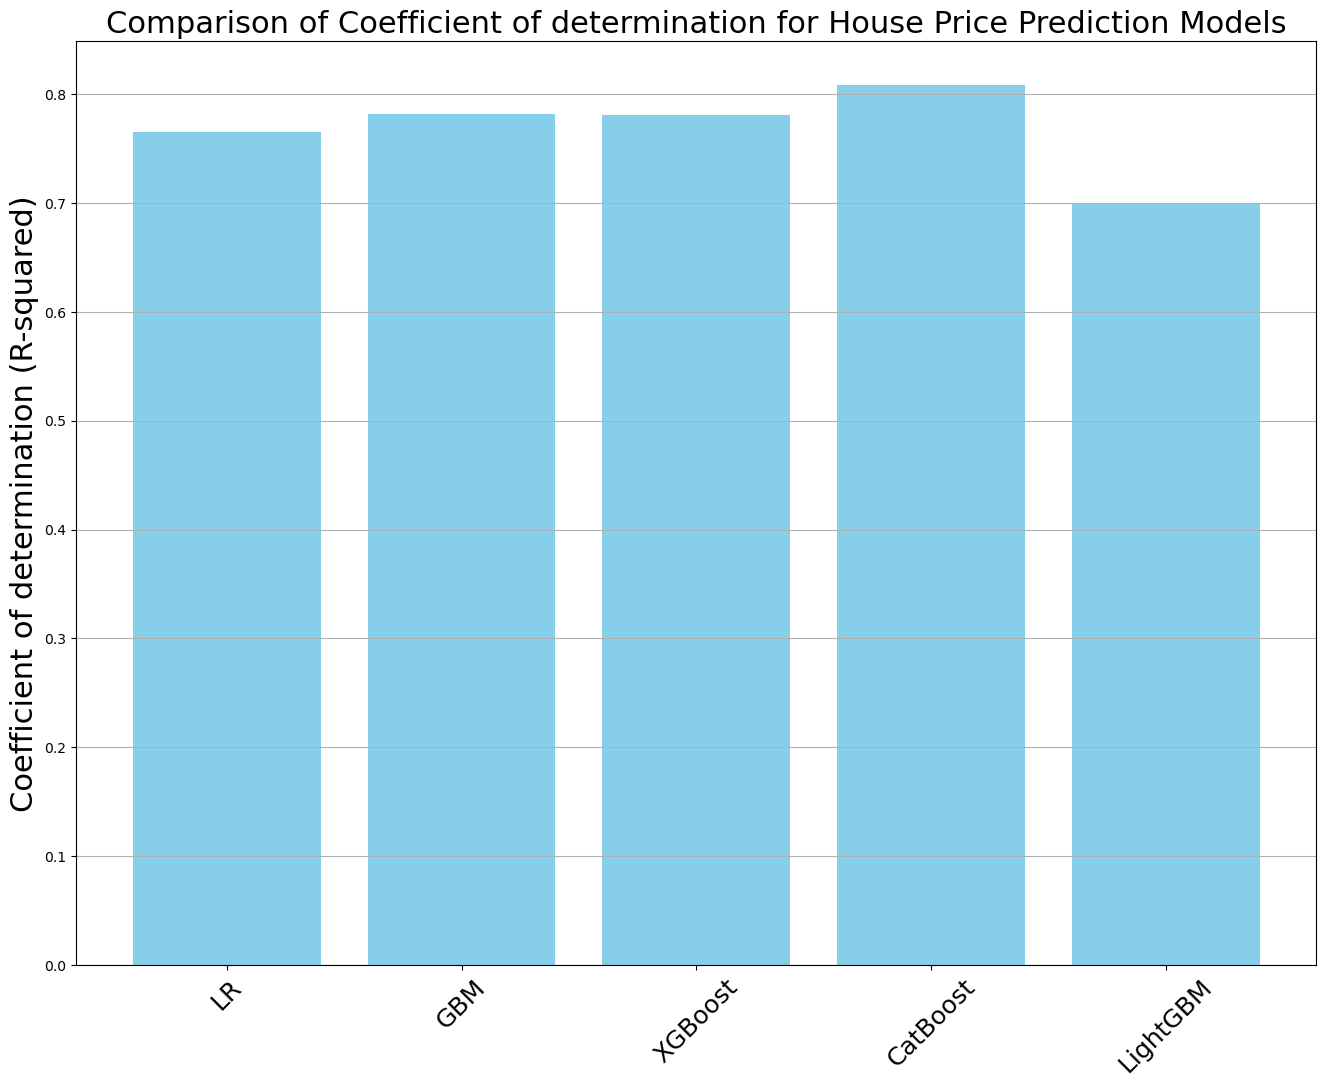

In [192]:
import matplotlib.pyplot as plt

model_names = ['LR', 'GBM', 'XGBoost', 'CatBoost', 'LightGBM']
r_scores = [0.7653, 0.7813, 0.7806, 0.8083, 0.6995]

bar_color = 'skyblue'

plt.figure(figsize=(16, 12))
plt.bar(model_names, r_scores, color=bar_color)
plt.ylabel('Coefficient of determination (R-squared)', fontsize=22)
plt.title('Comparison of Coefficient of determination for House Price Prediction Models', fontsize=22)

plt.xticks(rotation=45, fontsize=18)
plt.grid(axis='y')

# Save the plot as an image file
plt.savefig('r_comparison.png', dpi=300) 

# Display the plot
plt.show()

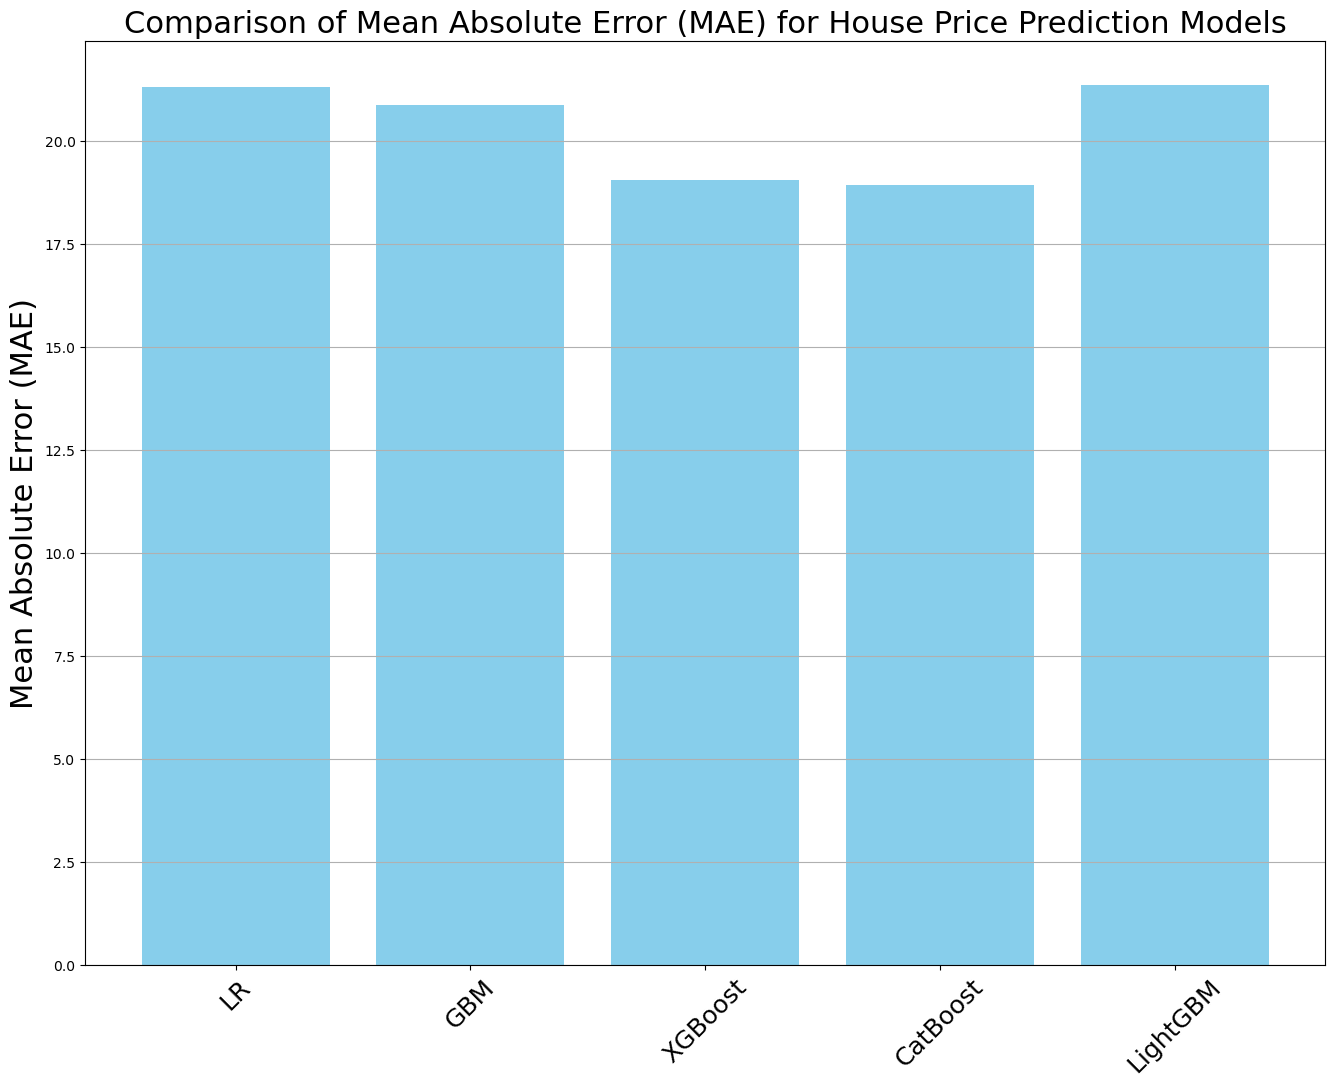

In [191]:
import matplotlib.pyplot as plt

model_names = ['LR', 'GBM', 'XGBoost', 'CatBoost', 'LightGBM']
mae_scores = [21.3184, 20.8853, 19.0569, 18.9544, 21.3706]

bar_color = 'skyblue'

plt.figure(figsize=(16, 12))
plt.bar(model_names, mae_scores, color=bar_color)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=22)
plt.title('Comparison of Mean Absolute Error (MAE) for House Price Prediction Models', fontsize=22)

plt.xticks(rotation=45, fontsize=18)
plt.grid(axis='y')

plt.savefig('mae_comparison.png', dpi=300) 

plt.show()

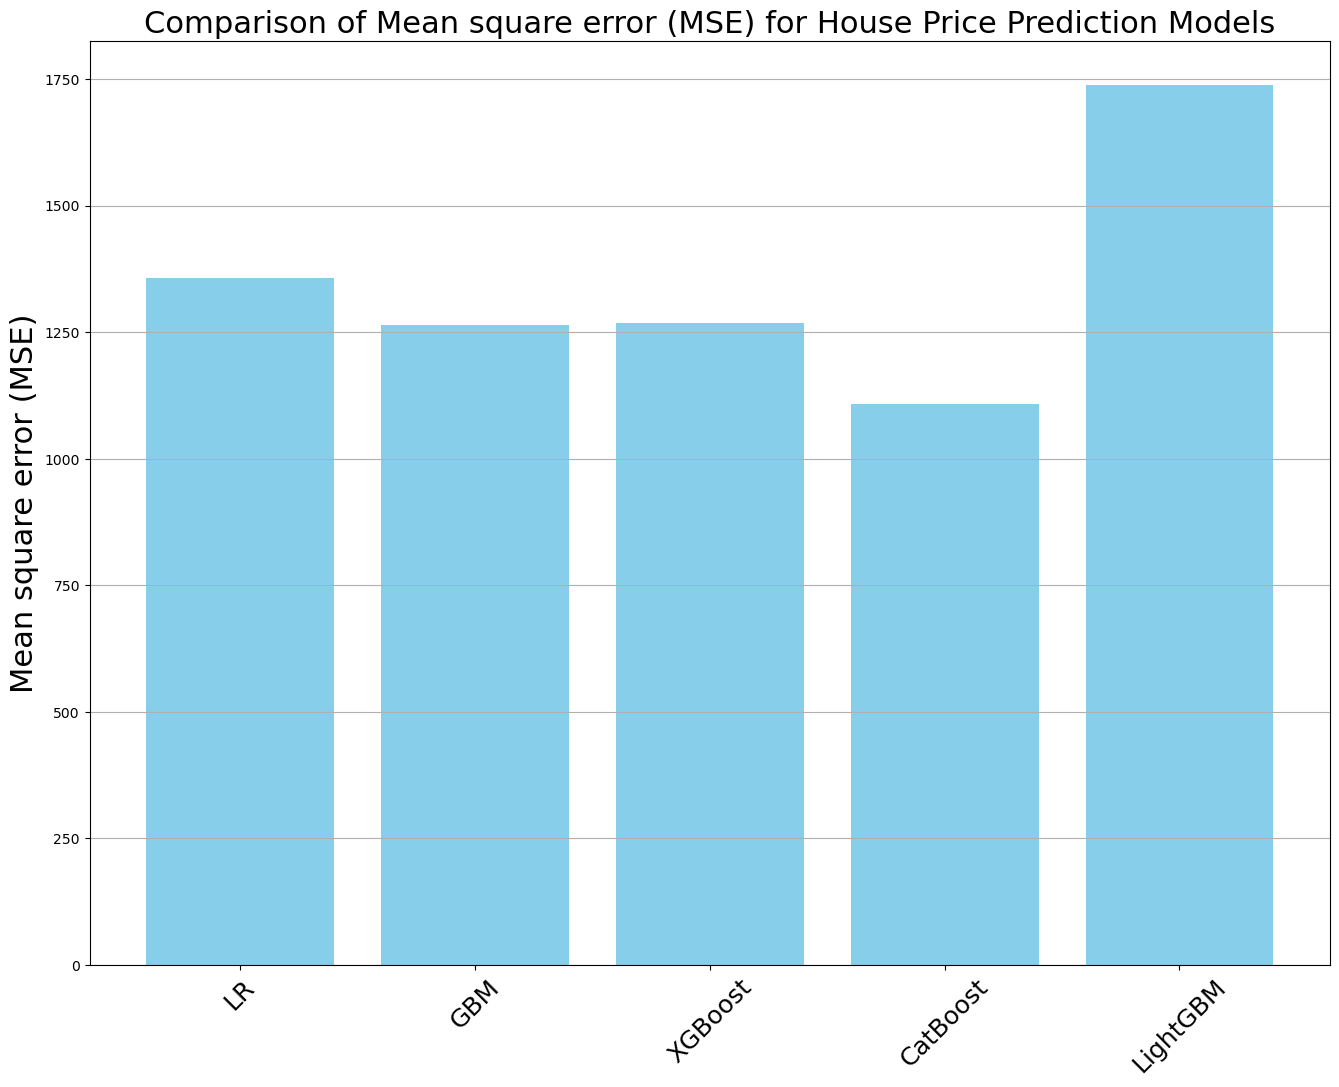

In [190]:
import matplotlib.pyplot as plt

model_names = ['LR', 'GBM', 'XGBoost', 'CatBoost', 'LightGBM']
mse_scores = [1357.4306, 1264.9474, 1268.9540, 1108.9005, 1738.0076]

bar_color = 'skyblue'
 
plt.figure(figsize=(16, 12))
plt.bar(model_names, mse_scores, color=bar_color)
plt.ylabel('Mean square error (MSE)', fontsize=22)
plt.title('Comparison of Mean square error (MSE) for House Price Prediction Models', fontsize=22)

plt.xticks(rotation=45, fontsize=18)
plt.grid(axis='y')

plt.savefig('mse_comparison.png', dpi=300) 

plt.show()

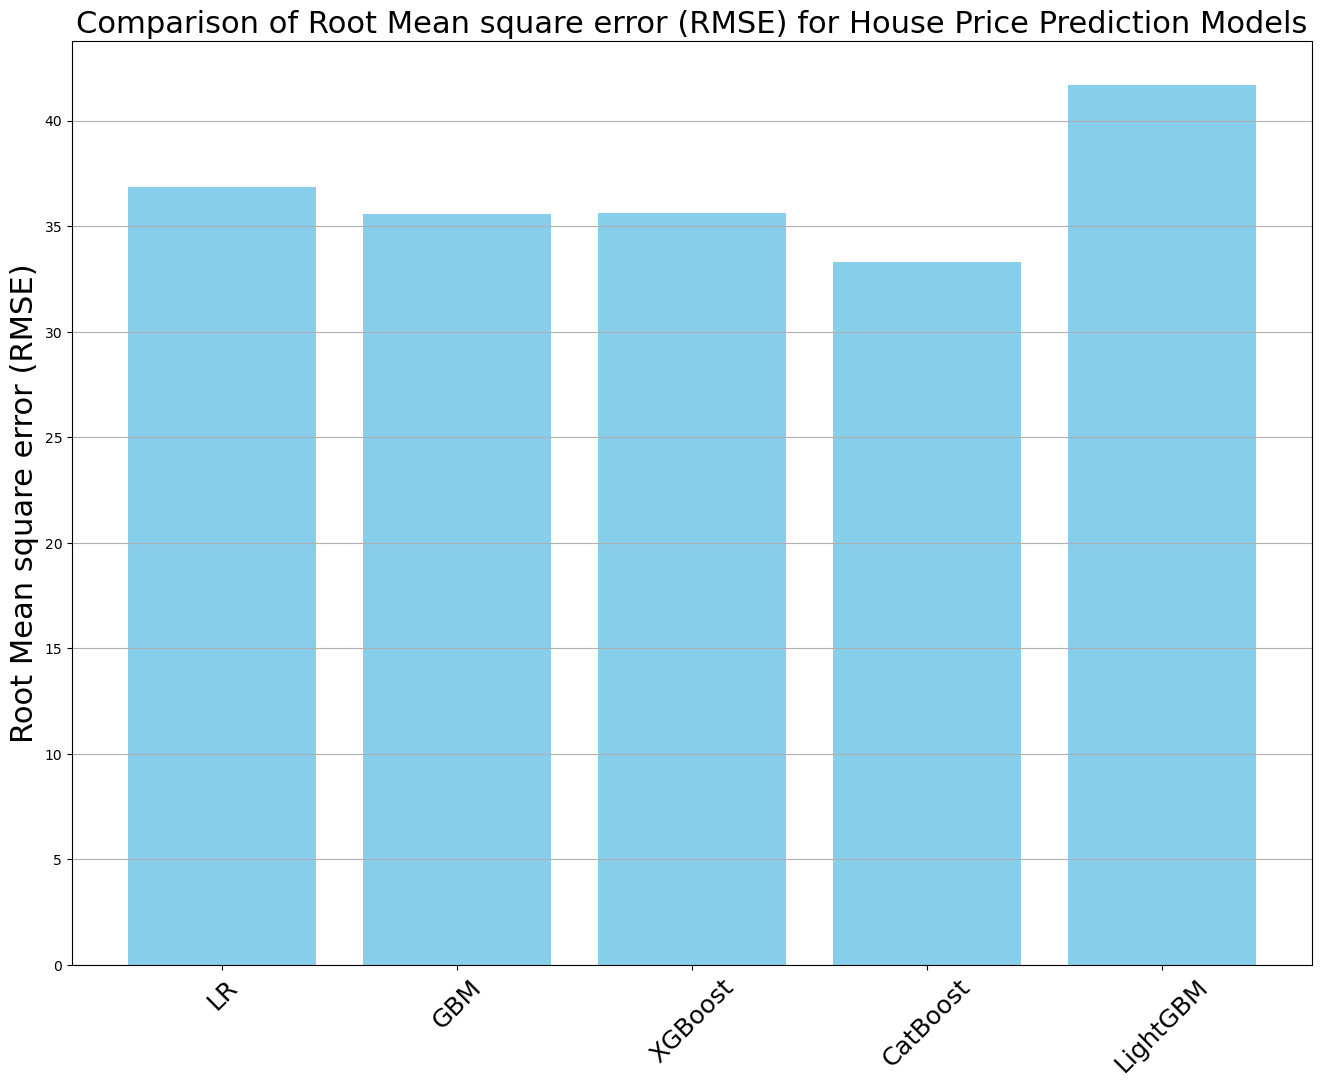

In [188]:
import matplotlib.pyplot as plt

model_names = ['LR', 'GBM', 'XGBoost', 'CatBoost', 'LightGBM']
mse_scores = [36.8433, 35.5661, 35.6224, 33.3002, 41.6894]

bar_color = 'skyblue'
 
plt.figure(figsize=(16, 12))
plt.bar(model_names, mse_scores, color=bar_color)
plt.ylabel('Root Mean square error (RMSE)', fontsize=22)
plt.title('Comparison of Root Mean square error (RMSE) for House Price Prediction Models', fontsize=22)

plt.xticks(rotation=45, fontsize=18)
plt.grid(axis='y')

# Save the plot as an image file
plt.savefig('rmse_comparison.png', dpi=300) 

# Display the plot
plt.show()

In [197]:
def predict_house_price(model, total_sqft, bath, bed, location, feature_names=None):
    
    x = np.zeros(len(feature_names)) if feature_names else np.zeros(len(model.coef_))
    
    x[0] = total_sqft
    x[1] = bath
    x[2] = bed
    
    if feature_names and location in feature_names:
        loc_index = feature_names.index(location)
        x[loc_index] = 1
    
    x = x.reshape(1, -1)  

    predicted_price = model.predict(x)
    
    return predicted_price[0]

In [198]:
predicted_price_lr = predict_house_price(lr_clf, 950, 2, 2, '1st Phase JP Nagar', feature_names=X.columns.tolist())

predicted_price_gbm = predict_house_price(gbm_clf, 950, 2, 2, '1st Phase JP Nagar', feature_names=X.columns.tolist())

predicted_price_xgb = predict_house_price(xgb_clf, 950, 2, 2, '1st Phase JP Nagar', feature_names=X.columns.tolist())

predicted_price_catboost = predict_house_price(catboost_clf, 950, 2, 2, '1st Phase JP Nagar', feature_names=X.columns.tolist())

predicted_price_lgb = predict_house_price(lgb_clf, 950, 2, 2, '1st Phase JP Nagar', feature_names=X.columns.tolist())


print("Predicted House Price with Linear Regression:", predicted_price_lr)
print("Predicted House Price with Gradient Boosting:", predicted_price_gbm)
print("Predicted House Price with XGBoost:", predicted_price_xgb)
print("Predicted House Price with CatBoost:", predicted_price_catboost)
print("Predicted House Price with LightGBM:", predicted_price_lgb)

Predicted House Price with Linear Regression: 78.52815449908759
Predicted House Price with Gradient Boosting: 47.18064831269832
Predicted House Price with XGBoost: 66.85823
Predicted House Price with CatBoost: 65.67244246792505
Predicted House Price with LightGBM: 47.13204177166806


C:\Users\gihan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\gihan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


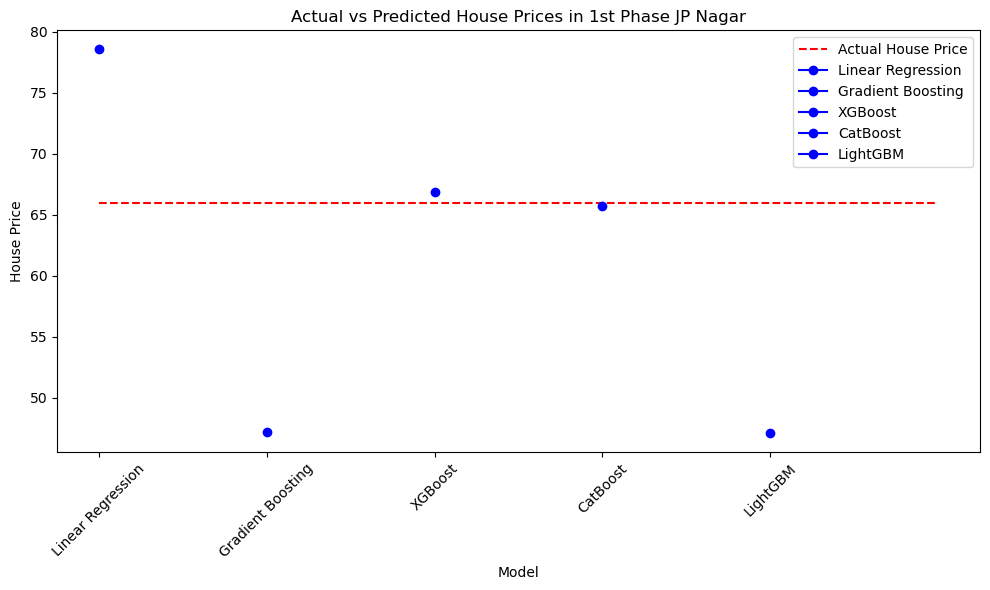

In [217]:
import matplotlib.pyplot as plt

# Define the real house price and predicted prices from different models
real_price = 65.96  # Actual house price
predicted_prices = [predicted_price_lr, predicted_price_gbm, predicted_price_xgb, 
                    predicted_price_catboost, predicted_price_lgb]
models = ['Linear Regression', 'Gradient Boosting', 'XGBoost', 'CatBoost', 'LightGBM']

# Plotting the real price and predicted prices
plt.figure(figsize=(10, 6))
plt.plot([0, len(predicted_prices)], [real_price, real_price], 'r--', label='Actual House Price')

# Plot each predicted price with a different color
for i, price in enumerate(predicted_prices):
    plt.plot(i , price, marker='o', color='b', label=models[i])

# Add labels, title, and legend
plt.xticks(range(len(predicted_prices)), models, rotation=45)
plt.ylabel('House Price')
plt.xlabel('Model')
plt.title('Actual vs Predicted House Prices in 1st Phase JP Nagar')
plt.legend()
plt.tight_layout()

# Save the plot to a file
plt.savefig('house_price_predictions_plot.png')

# Show plot
plt.show()

In [212]:
predicted_price_lr1 = predict_house_price(lr_clf, 1100, 2, 2, 'Electronic City Phase I', feature_names=X.columns.tolist())

predicted_price_gbm1 = predict_house_price(gbm_clf, 1100, 2, 2, 'Electronic City Phase I', feature_names=X.columns.tolist())

predicted_price_xgb1 = predict_house_price(xgb_clf, 1100, 2, 2, 'Electronic City Phase I', feature_names=X.columns.tolist())

predicted_price_catboost1 = predict_house_price(catboost_clf, 1100, 2, 2, 'Electronic City Phase I', feature_names=X.columns.tolist())

predicted_price_lgb1 = predict_house_price(lgb_clf, 1100, 2, 2, 'Electronic City Phase I', feature_names=X.columns.tolist())


print("Predicted House Price with Linear Regression:", predicted_price_lr1)
print("Predicted House Price with Gradient Boosting:", predicted_price_gbm1)
print("Predicted House Price with XGBoost:", predicted_price_xgb1)
print("Predicted House Price with CatBoost:", predicted_price_catboost1)
print("Predicted House Price with LightGBM:", predicted_price_lgb1)

Predicted House Price with Linear Regression: 67.99248159932313
Predicted House Price with Gradient Boosting: 53.686914270182974
Predicted House Price with XGBoost: 54.634544
Predicted House Price with CatBoost: 53.23129775318934
Predicted House Price with LightGBM: 54.66861065605405


C:\Users\gihan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\gihan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


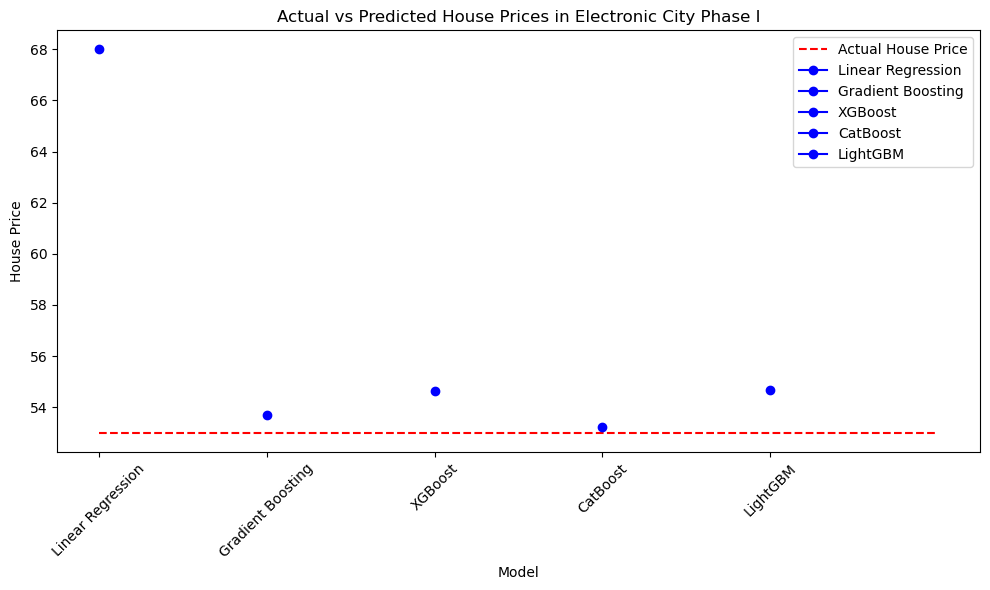

In [214]:
import matplotlib.pyplot as plt

# Define the real house price and predicted prices from different models
real_price = 53.00  # Actual house price
predicted_prices = [predicted_price_lr1, predicted_price_gbm1, predicted_price_xgb1, 
                    predicted_price_catboost1, predicted_price_lgb1]
models = ['Linear Regression', 'Gradient Boosting', 'XGBoost', 'CatBoost', 'LightGBM']

# Plotting the real price and predicted prices
plt.figure(figsize=(10, 6))
plt.plot([0, len(predicted_prices)], [real_price, real_price], 'r--', label='Actual House Price')

# Plot each predicted price with a different color
for i, price in enumerate(predicted_prices):
    plt.plot(i , price, marker='o', color='b', label=models[i])

# Add labels, title, and legend
plt.xticks(range(len(predicted_prices)), models, rotation=45)
plt.ylabel('House Price')
plt.xlabel('Model')
plt.title('Actual vs Predicted House Prices in Electronic City Phase I')
plt.legend()
plt.tight_layout()

# Save the plot to a file
plt.savefig('house_price_predictions_plot.png')

# Show plot
plt.show()

In [209]:
predicted_price_lr2 = predict_house_price(lr_clf, 1100, 2, 2, 'Whitefield', feature_names=X.columns.tolist())

predicted_price_gbm2 = predict_house_price(gbm_clf, 1100, 2, 2, 'Whitefield', feature_names=X.columns.tolist())

predicted_price_xgb2 = predict_house_price(xgb_clf, 1100, 2, 2, 'Whitefield', feature_names=X.columns.tolist())

predicted_price_catboost2 = predict_house_price(catboost_clf, 1100, 2, 2, 'Whitefield', feature_names=X.columns.tolist())

predicted_price_lgb2 = predict_house_price(lgb_clf, 1100, 2, 2, 'Whitefield', feature_names=X.columns.tolist())


print("Predicted House Price with Linear Regression:", predicted_price_lr2)
print("Predicted House Price with Gradient Boosting:", predicted_price_gbm2)
print("Predicted House Price with XGBoost:", predicted_price_xgb2)
print("Predicted House Price with CatBoost:", predicted_price_catboost2)
print("Predicted House Price with LightGBM:", predicted_price_lgb2)

Predicted House Price with Linear Regression: 54.42602378705432
Predicted House Price with Gradient Boosting: 53.686914270182974
Predicted House Price with XGBoost: 51.815815
Predicted House Price with CatBoost: 51.06351753353857
Predicted House Price with LightGBM: 50.92656097113592


C:\Users\gihan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\gihan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


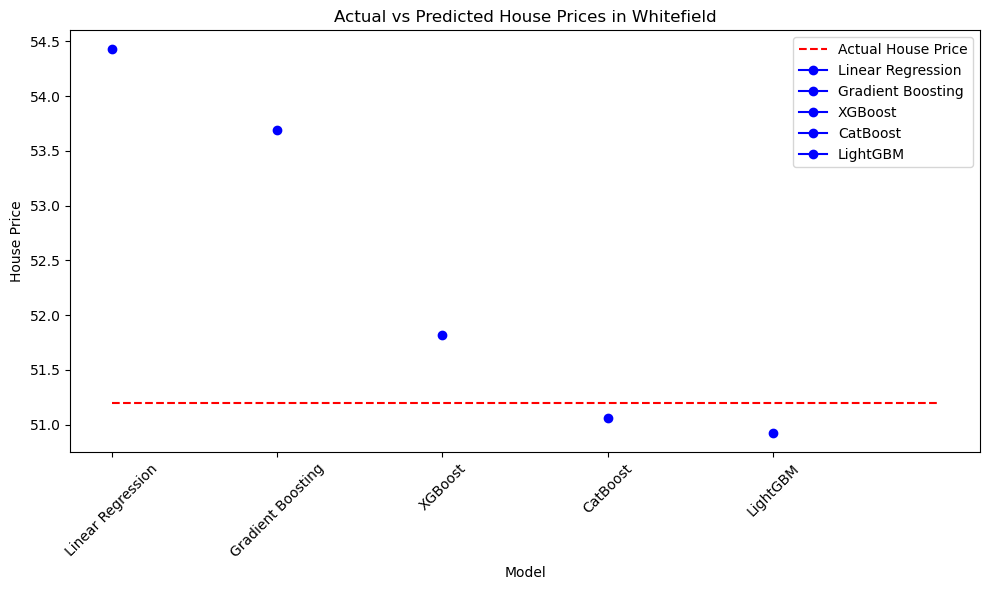

In [215]:
import matplotlib.pyplot as plt

# Define the real house price and predicted prices from different models
real_price = 51.2  # Actual house price
predicted_prices = [predicted_price_lr2, predicted_price_gbm2, predicted_price_xgb2, 
                    predicted_price_catboost2, predicted_price_lgb2]
models = ['Linear Regression', 'Gradient Boosting', 'XGBoost', 'CatBoost', 'LightGBM']

# Plotting the real price and predicted prices
plt.figure(figsize=(10, 6))
plt.plot([0, len(predicted_prices)], [real_price, real_price], 'r--', label='Actual House Price')

# Plot each predicted price with a different color
for i, price in enumerate(predicted_prices):
    plt.plot(i , price, marker='o', color='b', label=models[i])

# Add labels, title, and legend
plt.xticks(range(len(predicted_prices)), models, rotation=45)
plt.ylabel('House Price')
plt.xlabel('Model')
plt.title('Actual vs Predicted House Prices in Whitefield')
plt.legend()
plt.tight_layout()

# Save the plot to a file
plt.savefig('house_price_predictions_plot.png')

# Show plot
plt.show()